## Police Killings US
## About Dataset
"In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,000 such shootings recorded by The Post. After Michael Brown, an unarmed Black man, was killed in 2014 by police in Ferguson, Mo., a Post investigation found that the FBI undercounted fatal police shootings by more than half. This is because reporting by police departments is voluntary and many departments fail to do so. The Washington Post’s data relies primarily on news accounts, social media postings, and police reports. Analysis of more than five years of data reveals that the number and circumstances of fatal shootings and the overall demographics of the victims have remained relatively constant…" SOURCE ==> Washington Post Article

## For more information about this story

This dataset has been prepared by The Washington Post (they keep updating it on runtime) with every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.

## Features at the Dataset:

The file fatal-police-shootings-data.csv contains data about each fatal shooting in CSV format. The file can be downloaded at this URL. Each row has the following variables:

- id: a unique identifier for each victim
- name: the name of the victim
- date: the date of the fatal shooting in YYYY-MM-DD format
- mannerofdeath: shot, shot and Tasered
- armed: indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    - undetermined: it is not known whether or not the victim had a weapon
    - unknown: the victim was armed, but it is not known what the object was
    - unarmed: the victim was not armed
- age: the age of the victim
- gender: the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    - M: Male
    - F: Female
    - None: unknown
- race:
    - W: White, non-Hispanic
    - B: Black, non-Hispanic
    - A: Asian
    - N: Native American
    - H: Hispanic
    - O: Other
    - None: unknown
- city: the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
- state: two-letter postal code abbreviation
- signs of mental illness: News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
- threatlevel: The threatlevel column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
- flee: News reports have indicated the victim was moving away from officers
    - Foot
    - Car
    - Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.

- body_camera: News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Import Data

In [2]:
df = pd.read_csv("PoliceKillingsUS.csv",encoding_errors='ignore')

In [3]:
df.shape

(2535, 14)

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
df = df.drop(columns = ["id", "name"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2535 non-null   object 
 1   manner_of_death          2535 non-null   object 
 2   armed                    2526 non-null   object 
 3   age                      2458 non-null   float64
 4   gender                   2535 non-null   object 
 5   race                     2340 non-null   object 
 6   city                     2535 non-null   object 
 7   state                    2535 non-null   object 
 8   signs_of_mental_illness  2535 non-null   bool   
 9   threat_level             2535 non-null   object 
 10  flee                     2470 non-null   object 
 11  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), object(9)
memory usage: 203.1+ KB


In [7]:
df.isnull().sum()

date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [8]:
dtime = pd.to_datetime(df.date).dt
df["year"] = dtime.year
df["month"] = dtime.month
df["day"] = dtime.day

In [9]:
df = df.drop(["date"], axis = 1)

In [10]:
for col in df.select_dtypes(['object','bool']).columns:
    print(col,":",df[col].nunique())
    print(df[col].unique(),'\n')

manner_of_death : 2
['shot' 'shot and Tasered'] 

armed : 68
['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'vehicle' 'shovel'
 'hammer' 'hatchet' 'undetermined' 'sword' 'machete' 'box cutter'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'metal pole' 'Taser'
 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' nan 'carjack' 'chain' "contractor's level"
 'unknown weapon' 'stapler' 'beer bottle' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'scissors' 'pole' 'pick-axe' 'flashlight' 'baton' 'spear' 'pitchfork'
 'hatchet and gun' 'rock' 'piece of wood' 'bayonet' 'pipe' 'glass shard'
 'motorcycle' 'metal rake' 'crowbar' 'oar' 'machete and gun' 'tire iron'
 'air conditioner' 'pole and knife' 'baseball bat and bottle' 'fireworks'
 'pen'] 

gender : 2
['M' 'F'] 

race : 6
['A' '

- Multiple distinct values in `armed`, `city` and `state`.

In [11]:
df.describe()

,age,year,month,day
count,2458.000000,2535.000000,2535.000000,2535.000000
mean,36.605370,2015.838264,6.148323,15.574753
std,13.030774,0.770840,3.399140,8.919830
min,6.000000,2015.000000,1.000000,1.000000
25%,26.000000,2015.000000,3.000000,7.000000
50%,34.000000,2016.000000,6.000000,16.000000
75%,45.000000,2016.000000,9.000000,23.000000
max,91.000000,2017.000000,12.000000,31.000000


- Ages range from 6 to 91 yo. Mean and medium is 36.6 and 34 yo.
- Records cover 2015 - 2017.

# EDA

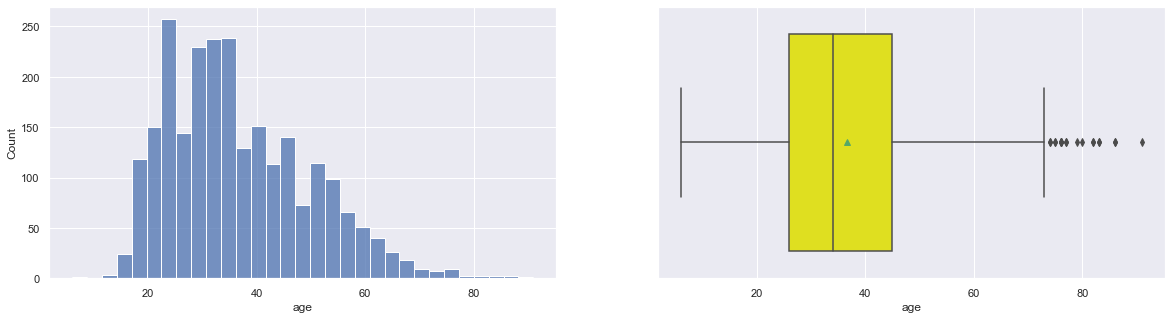

In [12]:
plt.figure(figsize = (20,5));
plt.subplot(121)
sns.histplot(df.age);
plt.subplot(122)
sns.boxplot(x = "age", data = df, showmeans = True, color = "yellow");

In [13]:
def countplot(col, top_n = 10):
    # sort in descending order, keep only top_n categories
    ax = sns.countplot(x = col, data = df, order = df[col].value_counts().index[: top_n]);
    for p in ax.patches:
        perc = np.round(100 * p.get_height() / df.shape[0], 2)
        plt.annotate(text = str(perc) + "%", xy = (p.get_x() + p.get_width()/2 - 0.2, p.get_y() + p.get_height()))

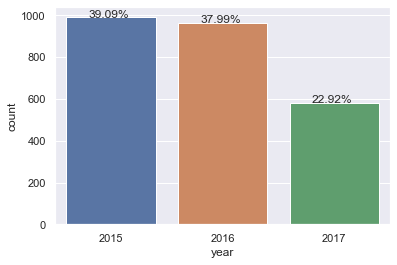

In [14]:
countplot("year")

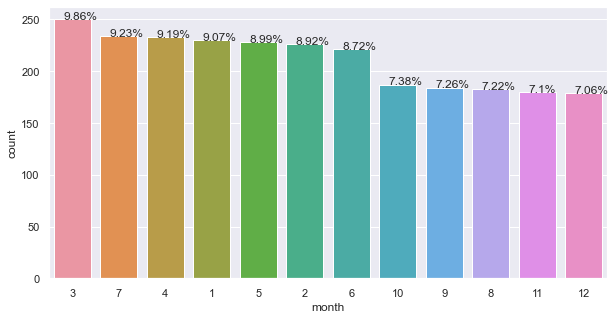

In [15]:
plt.figure(figsize = (10,5));
countplot("month", 12)

- August - December see less shootings than other months.

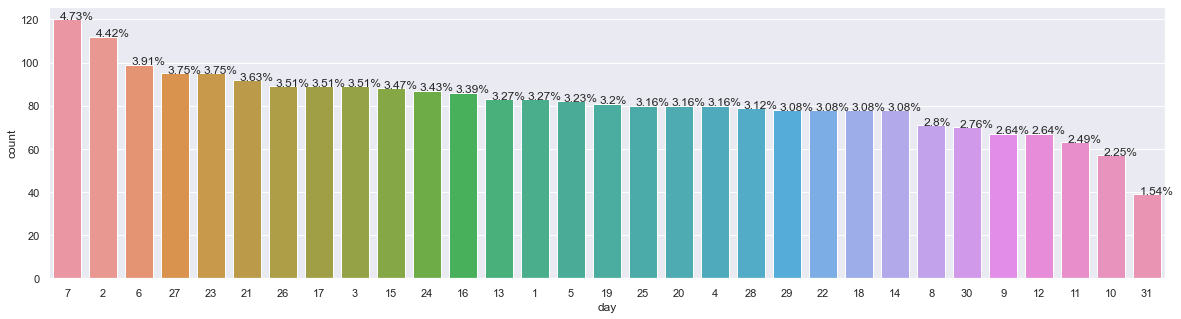

In [16]:
plt.figure(figsize = (20,5));
countplot("day", 31)

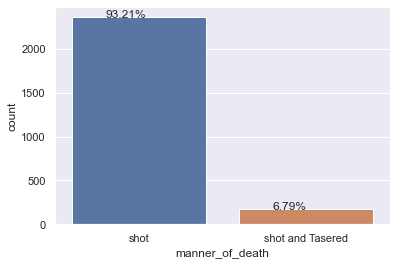

In [17]:
countplot("manner_of_death")

- Victims were shot to death in more than 90% of the cases.

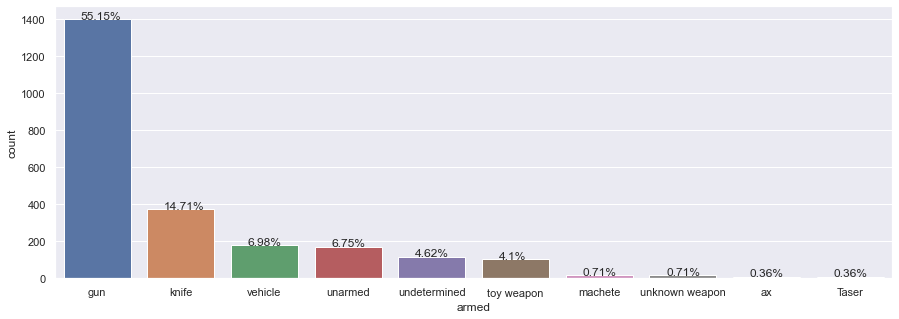

In [18]:
plt.figure(figsize = (15,5));
countplot("armed")

- More than half of the cases, the victim was armed with gun, followed by knife.
- In 6.8% of the cases, victims were unarmed.
- In 4.6% of the cases, it's not clear whether the victim carried a weapon.
- 4.1% of victims used toy weapon. 

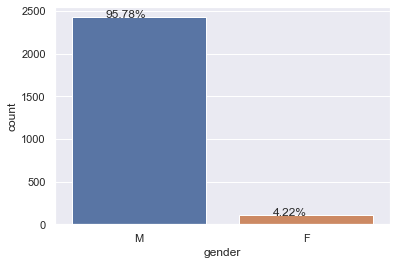

In [19]:
countplot("gender")

- Male accounts for more than 95% of the cases.

In [20]:
df["race"].fillna("Unknown",inplace = True)

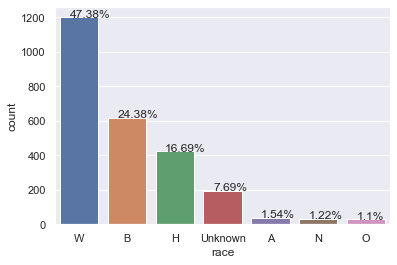

In [21]:
countplot("race")

- White and Black people totally account for more than 70% of the cases, followed by Hispanic of 16.7%.

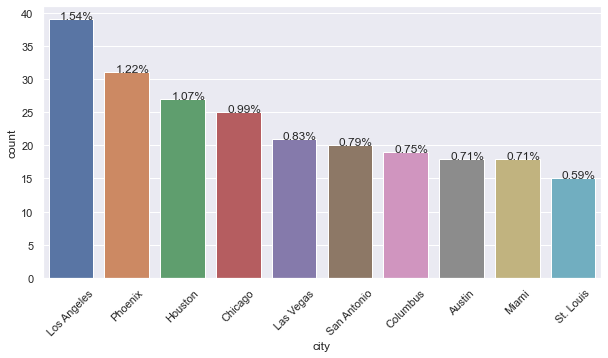

In [22]:
plt.figure(figsize = (10,5));
countplot("city")
plt.xticks(rotation = 45);

- Top 10 cities with most police shootings are metros.

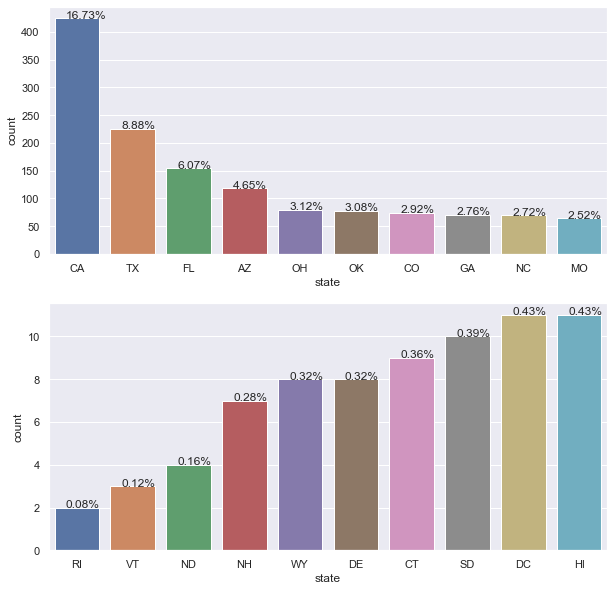

In [23]:
plt.figure(figsize = (10,10));
plt.subplot(211);
countplot("state")

plt.subplot(212);
ax = sns.countplot(x = "state", data = df, order = df["state"].value_counts().index[-1:-11:-1]);
for p in ax.patches:
    perc = np.round(100 * p.get_height() / df.shape[0], 2)
    plt.annotate(text = str(perc) + "%", xy = (p.get_x() + p.get_width()/2 - 0.2, p.get_y() + p.get_height()))

- California, Texas and Florida are top 3 states with most police shootings.
- Rhode Island, Vermont and North Dakota are top 3 states with least police shootings.

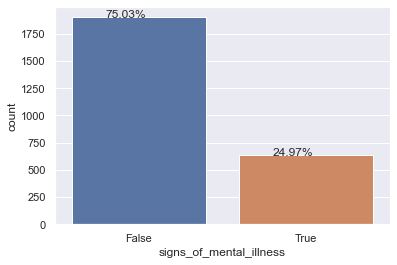

In [24]:
countplot("signs_of_mental_illness")

- Among 75% of the cases, victim didn't show signs of mental illness.

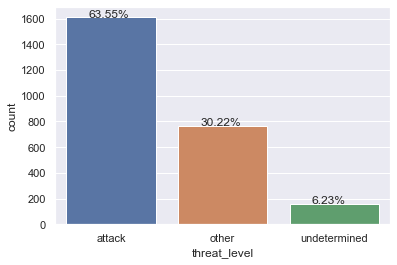

In [25]:
countplot("threat_level")

- Direct and immediate life threat exist in 64% of cases. Significant threat exist in 30% of cases.

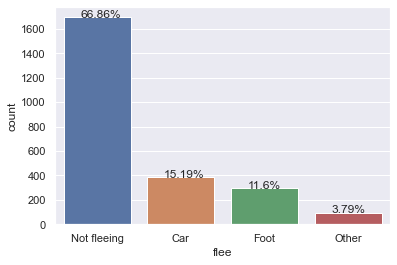

In [26]:
countplot("flee")

- Nearly 70% of the cases, the victim didn't flee before shot to death.

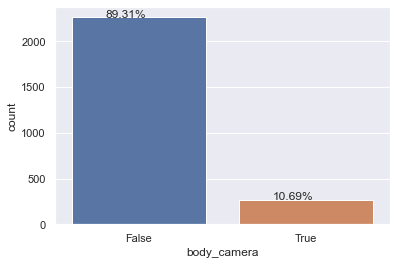

In [27]:
countplot("body_camera")

- Nearly 90% of cases, no reports about police wearing body camera.

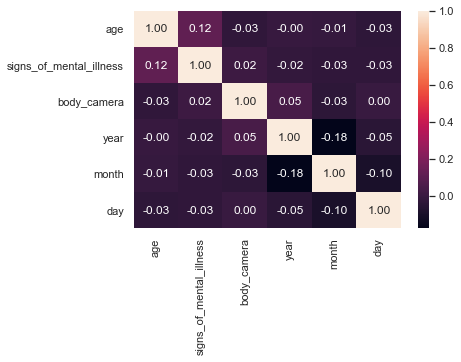

In [28]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f");

## race vs gender

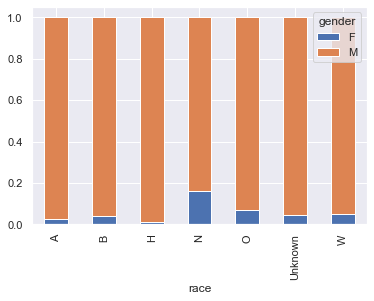

In [29]:
pd.crosstab(index = df.race, columns = df.gender, normalize = "index").plot(kind = 'bar', stacked = True);

- For any race except Native American, male victims account for the majority of at least 90%. 
- For Native American, male victims only account for about 82%.

## race vs age

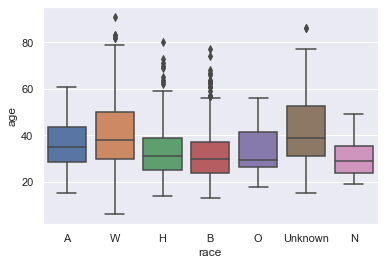

In [30]:
sns.boxplot(x = "race", y = "age", data = df);

- White and Unknown race have more dispersive distribution of age and higher median age.

## race vs armed

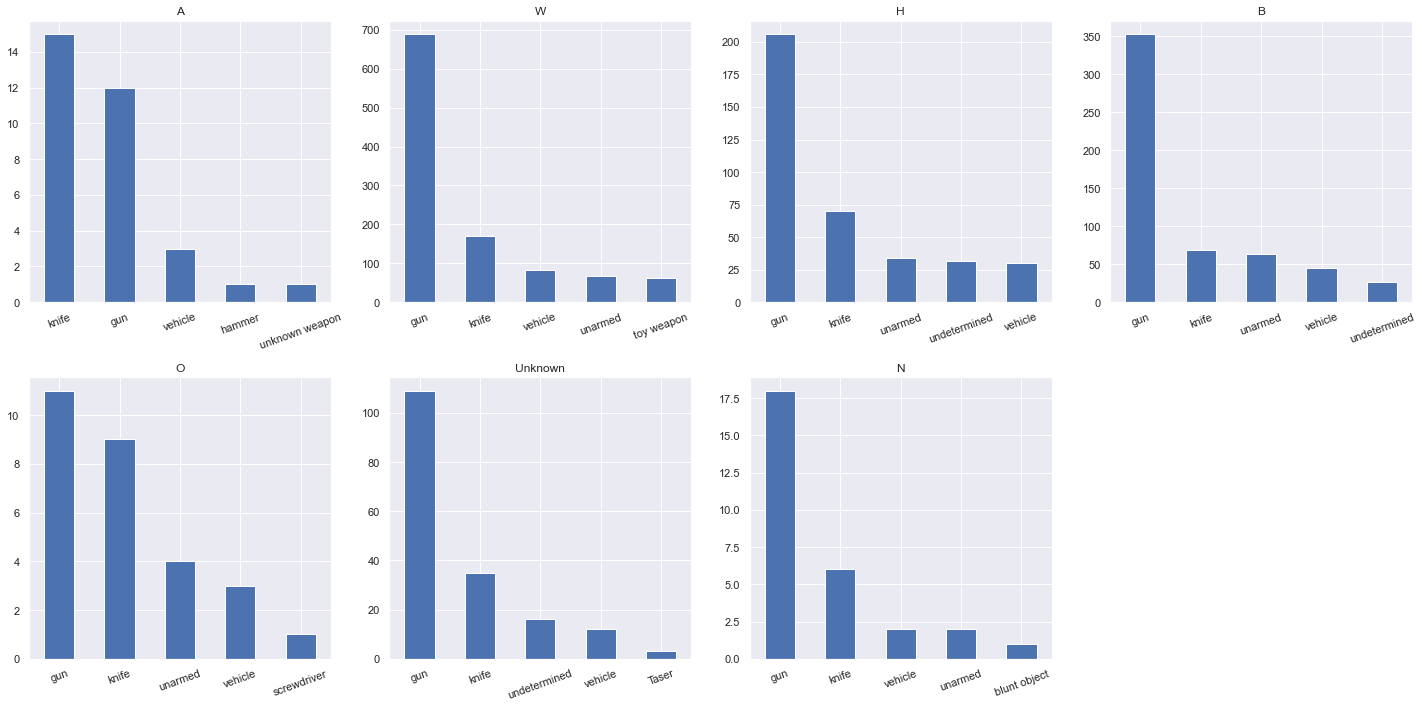

In [31]:
fig = plt.figure(figsize = (20,10));
for i, r in enumerate(df.race.unique()):
    plt.subplot(2,4,i + 1)
    df.loc[df.race == r, "armed"].value_counts()[:5].plot(kind = "bar"); # top 5 weapons for each race
    plt.xticks(rotation = 20);
    plt.title(r);
    
fig.tight_layout();

- While all races prefer knife and gun to other weapons, knife is the first choice for Asians.
- Vehicle is among the top 5 weapons for each race.
- Whites may use toy weapons.

## races in top 10 cities with most police shootings

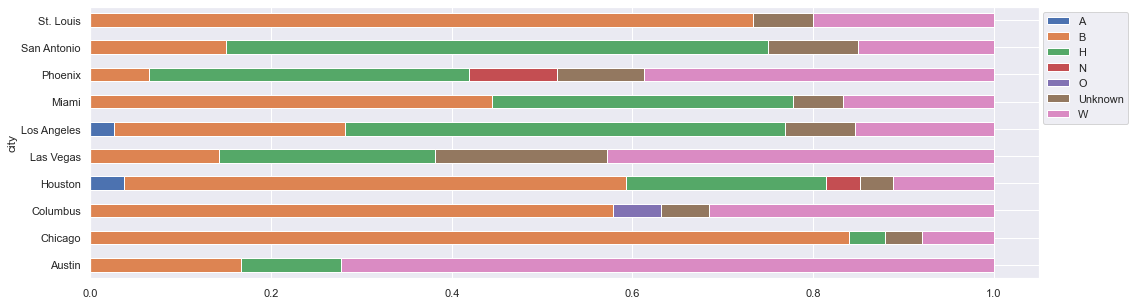

In [32]:
cities = df.city.value_counts().index[:10]
pd.crosstab(index = df.loc[df.city.isin(cities),"city"], columns = df.race, normalize = "index").plot(kind = 'barh', 
            stacked = True, figsize = (17,5));
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- San Antonio, Los Angeles and Phoenix have many cases related to Hispanics.
- St. Louis, Houston, Columbus, Chicago have more than 50% of cases related to Blacks.
- Only Los Angeles and Houston have a few cases related to Asians. Only Phoenix and Houston have a few cases related to Native Americans.
- Austin has 70% of cases related to Whites.

## races in top 10 states with most police shooting

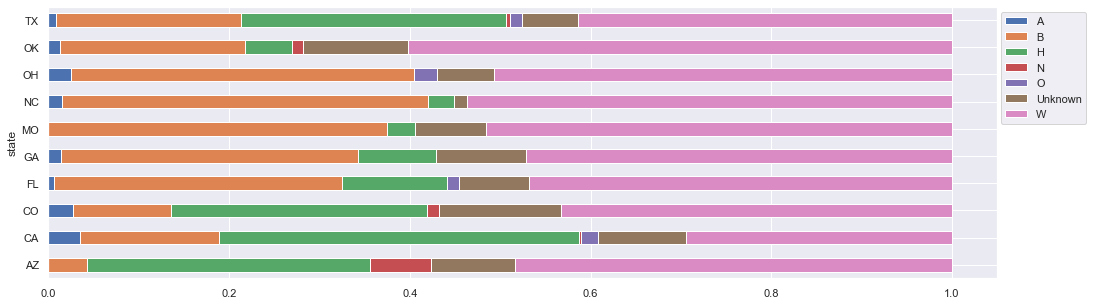

In [33]:
states = df.state.value_counts().index[:10]
pd.crosstab(index = df.loc[df.state.isin(states),"state"], columns = df.race, normalize = "index").plot(kind = 'barh', 
            stacked = True, figsize = (17,5));
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- For each state in top 10 list, Whites account for about 50% of cases.
- CA, AZ, TX, CO have a significant number of cases related to Hispanics.
- OH, NC, MO, GA, FL have a significant number of cases related to Blacks.
- AZ has more cases related to Natice Americans than other top 9 states.

## for each specific race, states with most cases

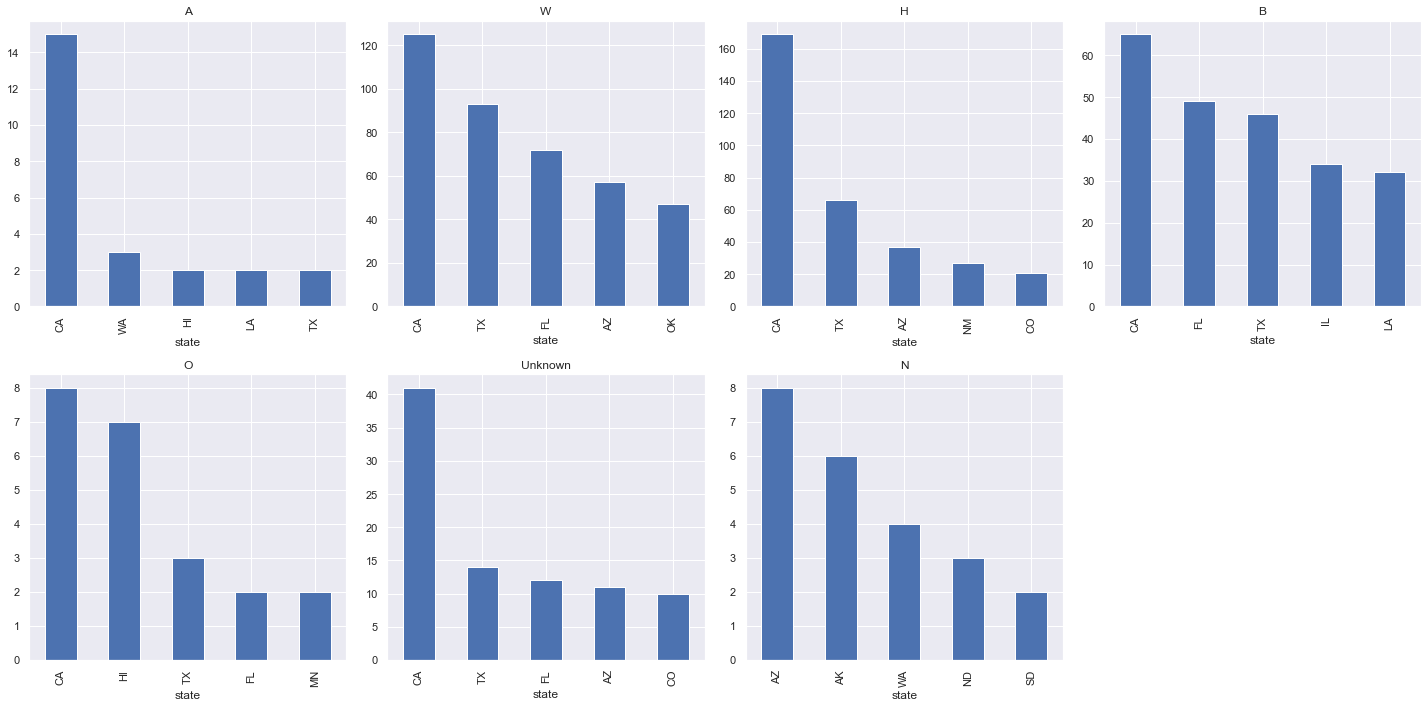

In [34]:
race_state_df = df.groupby(["race","state"])["state"].count()
fig = plt.figure(figsize = (20,10));
for i, r in enumerate(df.race.unique()):
    plt.subplot(2,4, i + 1)
    ax = race_state_df.loc[r,:].sort_values(ascending = False)[:5].plot.bar();
    ax.set_xticklabels(race_state_df.loc[r,:].sort_values(ascending = False)[:5].index)
    plt.title(r);
    
fig.tight_layout();

## race vs mental illness

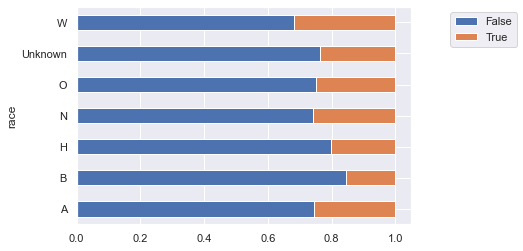

In [35]:
pd.crosstab(index = df.race, columns = df.signs_of_mental_illness, normalize = "index").plot(kind = 'barh',
                                                                                             stacked = True);
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- Mental illness show on Whites more commonly. Least common for Blacks.

## race vs threat level

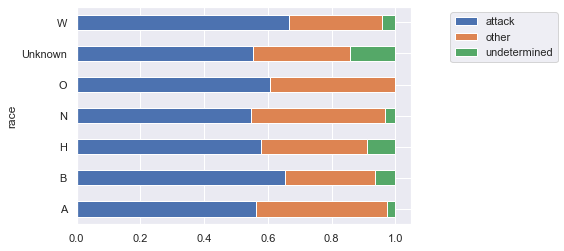

In [36]:
pd.crosstab(index = df.race, columns = df.threat_level, normalize = "index").plot(kind = 'barh',stacked = True);
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- White or Black victims are more likely to impose immediate life threat to police or others.

## race vs body camera

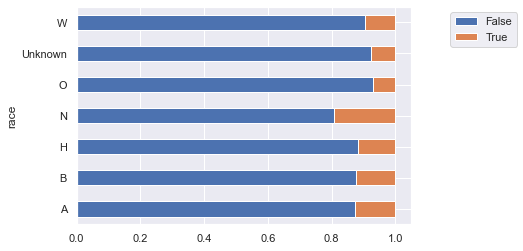

In [37]:
pd.crosstab(index = df.race, columns = df.body_camera, normalize = "index").plot(kind = 'barh',stacked = True);
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- Body camera is more likely to use in the cases of Native Americans.

## mental illness vs manner of death 

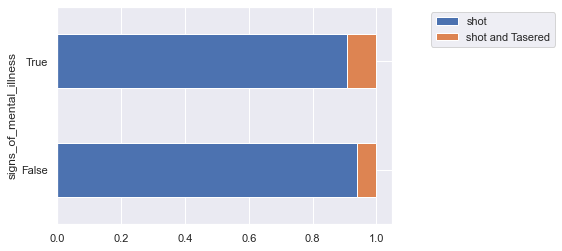

In [38]:
pd.crosstab(index = df.signs_of_mental_illness, columns = df.manner_of_death,
            normalize = "index").plot(kind = 'barh', stacked = True);
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- Taser is more likely to used in the cases of victim with mental illness.

## mental illness vs gender

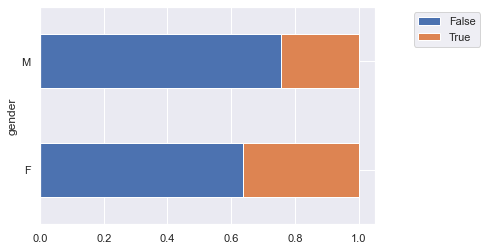

In [39]:
pd.crosstab(index = df.gender, columns = df.signs_of_mental_illness,normalize = "index").plot(kind = 'barh', 
                                                                                              stacked = True);
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- Female victims are more likely to have mental illness.

## gender vs flee

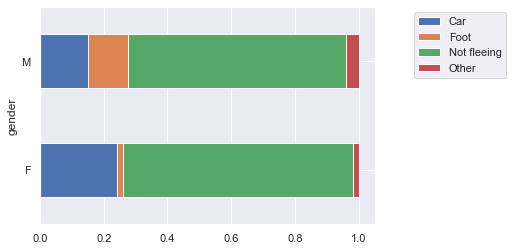

In [40]:
pd.crosstab(index = df.gender, columns = df.flee,normalize = "index").plot(kind = 'barh', stacked = True);
plt.legend(loc = "best",bbox_to_anchor = (1.1,1));

- Though not fleeing is the most common case for victims, female victim is more likely to flee by car than on foot.

## Change of threat level during 2015 - 2017

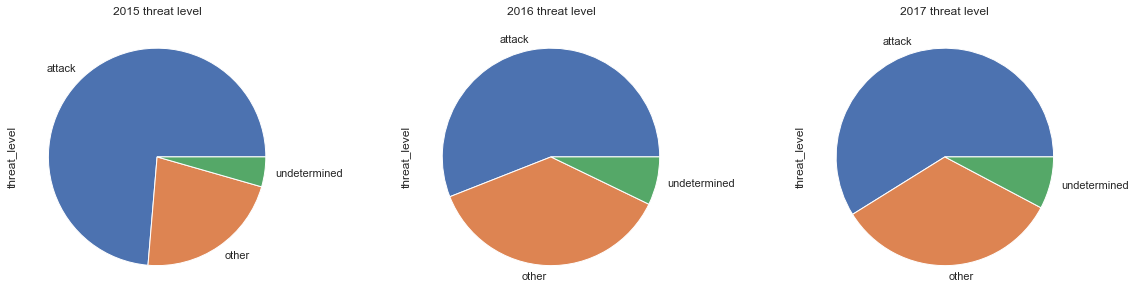

In [41]:
plt.figure(figsize = (20,5));
for i, y in enumerate(np.sort(df.year.unique())):
    plt.subplot(1,3, i + 1)
    df[df.year == y].groupby("threat_level")["threat_level"].count().plot.pie();
    plt.title(str(y) + " threat level");

- The portion of cases with highest threat level decrease in 2016 compared to 2015.

## The usage of body camera during 2015 - 2017

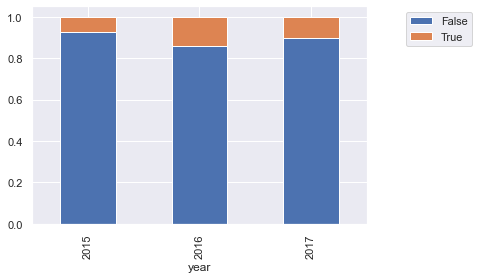

In [42]:
pd.crosstab(index = df.year, columns = df.body_camera,normalize = "index").plot(kind = 'bar', stacked = True);
plt.legend(loc = "best", bbox_to_anchor = (1.1,1));

- Usage of body camera increases from 2015 to 2016, but decreases from 2016 to 2017.

## Usage of body cameras among states

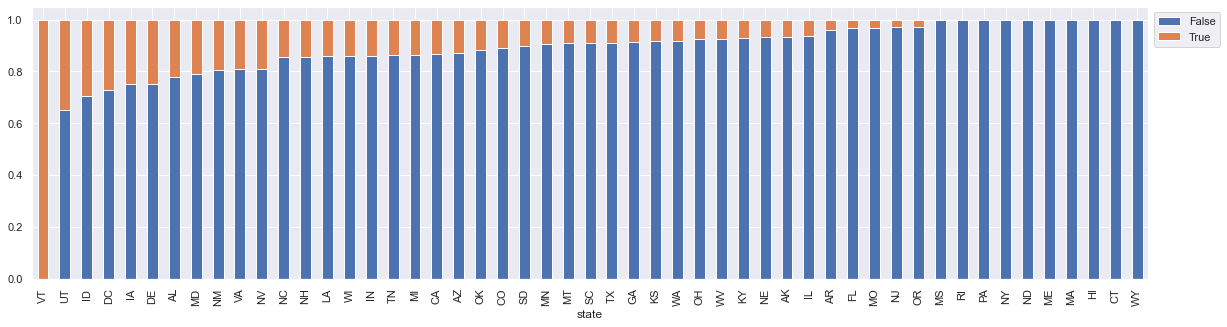

In [43]:
pd.crosstab(index = df.state, columns = df.body_camera, normalize = "index").sort_values(by =True,
    ascending = False).plot(kind = "bar",stacked = True, figsize = (20,5));
plt.legend(loc = "best", bbox_to_anchor = (1,1));

- Police in VT, UT, ID use body camera most commonly, while police in WY, CT, HI least commonly.

## Perferred weapons for victims in different age groups

In [44]:
df["age_group"] = df["age"].apply(lambda x: "unknown" if x != x else "child" if x < 13 else "teen" if x < 20
                                  else "adult" if x < 65 else "senior")

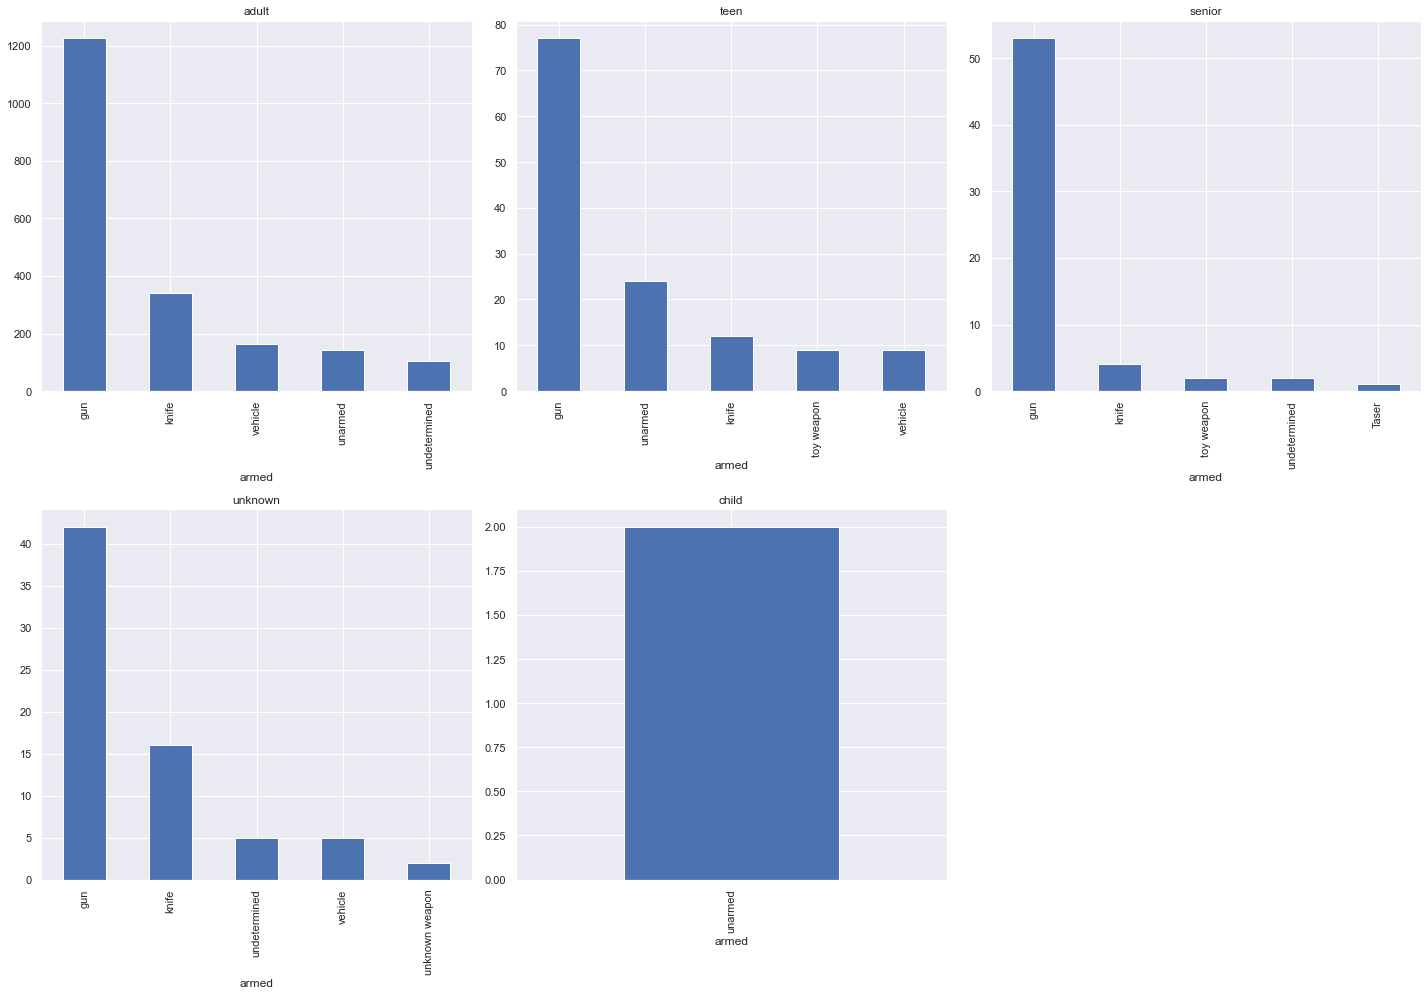

In [45]:
age_armed_df = df.groupby(["age_group","armed"])["armed"].count()
fig = plt.figure(figsize = (20,14));
for i, ag in enumerate(df.age_group.unique()):
    plt.subplot(2,3, i + 1)
    ax = age_armed_df.loc[ag,:].sort_values(ascending = False)[:5].plot.bar();
    ax.set_xticklabels(age_armed_df.loc[ag,:].sort_values(ascending = False)[:5].index)
    plt.title(ag);
    
fig.tight_layout();

- Children are unarmed.
- Gun and knife are preferred by all the other age groups. Teens and seniors also prefer toy weapons.